In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df=pd.read_excel('/content/Airbnb_Open_Data.xlsx')

In [9]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [12]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [19]:
#Drop duplicate records
df .drop_duplicates(inplace = True)

#drop house_rules and license colons with insufficient data
# df .drop(['house_rules','license'],axis = 1, inplace = True)

#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$','',regex= False)
df['service fee'] = df['service fee'].astype(str).str.replace('$','',regex= False)

#remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',','',regex = False)
df['service fee'] = df['service fee'].str.replace(',','',regex= False)

#rename the price and service fee columns to include a dollar sign
df.rename (columns = {'price':'$price','service fee':'$service fee'},inplace = True)

#Drop all record with missing values
df.dropna(inplace = True)

#change all mismatched data types to the appropriate once
df['$price'] = df['$price'].astype(float)
df['$service fee'] = df['$service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#correct the spelling of 'brookln' to 'brooklyn'
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group'] = 'brooklyn'

#get rid of outliers in the 'availability 365' column data
df= df.drop(df[df['availability 365'] > 365].index)

KeyError: 'price'

In [20]:
df.duplicated().value_counts()

,count
False,81635


In [21]:
df.describe()

,lat,long,instant_bookable,Construction year,$price,$service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81635.000000,81635.000000,81635.000000,81635.000000,81443.000000,81413.000000,81635.000000,81635.000000,81635,81635.000000,81635.000000,81635.000000,81635.000000
mean,40.727261,-73.948262,0.497495,2012.491480,626.746227,125.316178,7.449440,31.976334,2019-06-21 23:05:57.155631872,1.389208,3.286544,7.124505,135.038844
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687630,-73.982070,0.000000,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-05 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721270,-73.953580,0.000000,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762485,-73.930460,1.000000,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056382,0.050622,0.499997,5.760668,331.766290,66.350398,28.384755,51.611969,NaN,1.759669,1.278688,29.868488,128.489020


WHAT are the different property types in the dataset?

In [23]:
#WHAT are the different property types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,43128
Private room,36774
Shared room,1623
Hotel room,110


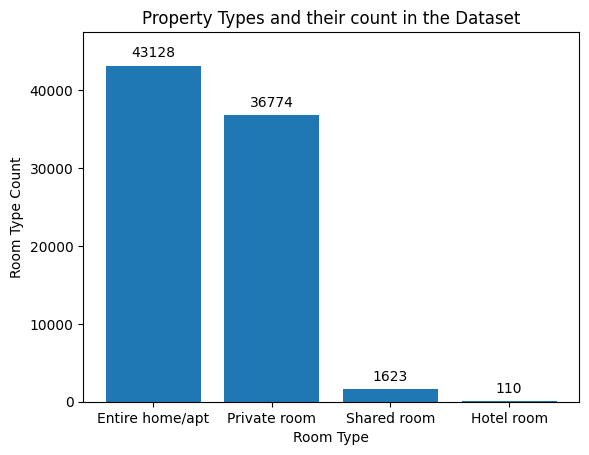

In [25]:
#room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels = property_types.loc[:,"count"],padding = 4);
plt.ylim([0, property_types.loc[:,"count"].max() * 1.1]); # Set y-axis limits
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');
plt.show()

Which neighborhood group has the heighest bumber of listings?

In [26]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,33861
Manhattan,33708
Queens,11005
Bronx,2250
Staten Island,810
brooklyn,1


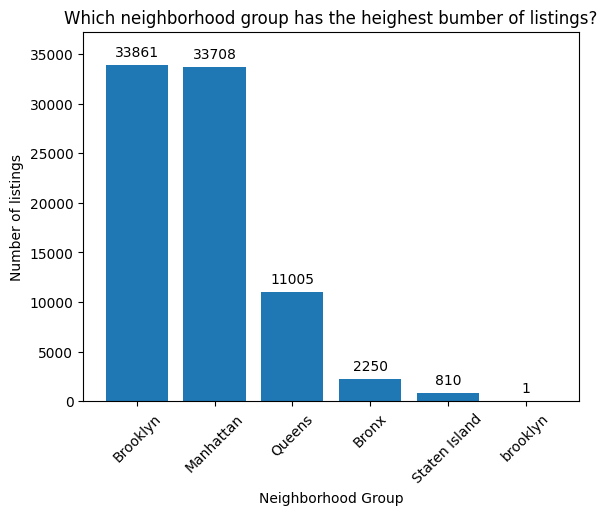

In [27]:
#Which neighborhood group has the heighest bumber of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels = hood_group.loc[:,"count"],padding = 4);
plt.ylim([0, hood_group.loc[:,"count"].max() * 1.1]); # Set y-axis limits
plt.xlabel('Neighborhood Group');
plt.ylabel('Number of listings');
plt.xticks(rotation = 45);
plt.title('Which neighborhood group has the heighest bumber of listings?');

Which neighborhoods group have the highest average prices for Airbnb listings?

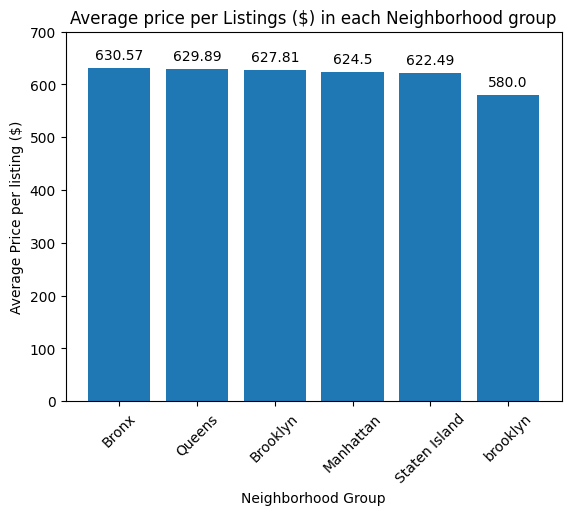

In [29]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['$price'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"$price"]);
plt.bar_label(avg_price_bar,labels = round(avg_price.loc[:,"$price"],2),label_type = 'edge',padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per listing ($)');
plt.xticks(rotation = 45);
plt.title('Average price per Listings ($) in each Neighborhood group');

Is there a relationship between the construction year of property and price?

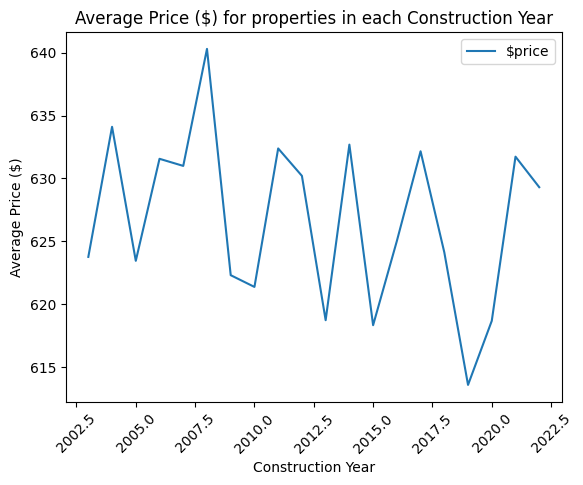

In [34]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['$price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.xticks(rotation = 45);
plt.title('Average Price ($) for properties in each Construction Year');
#

Who are the top 10 hosts by calculated host listing count?

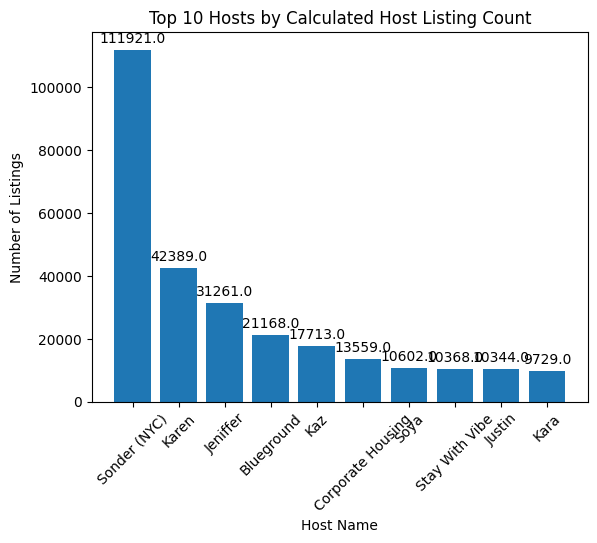

In [36]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,labels = hosts.loc[:,"calculated host listings count"],label_type='edge',padding = 3);
plt.xlabel('Host Name');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Top 10 Hosts by Calculated Host Listing Count');

Are hosts with verified identities more likely to receive positive reviews?

In [38]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.289735
unconfirmed,3.283351


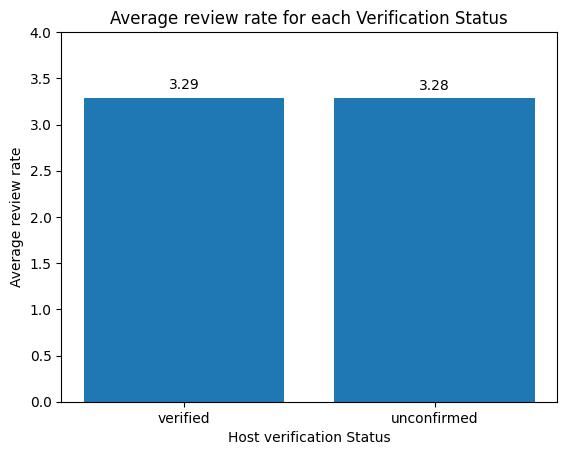

In [39]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels = round(review.loc[:,"review rate number"],2),padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host verification Status');
plt.ylabel('Average review rate');
plt.title('Average review rate for each Verification Status');


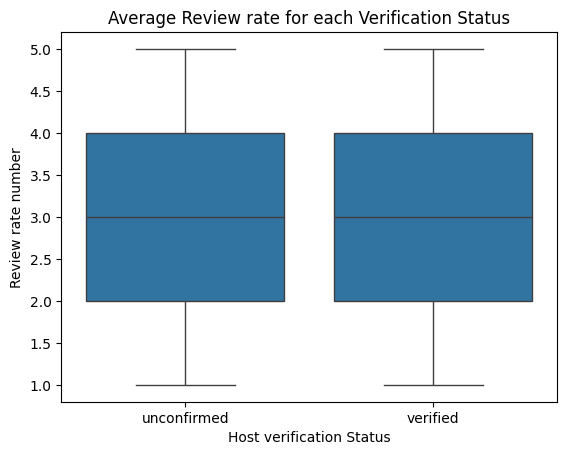

In [40]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y = 'review rate number', color = base_color);
plt.xlabel('Host verification Status');
plt.ylabel('Review rate number');
plt.title('Average Review rate for each Verification Status');

Is there a correlation between the price of a listing and its service fee?

In [45]:
#Is there a correlation between the price of a listing and its service fee?
df['$price'].corr(df['$service fee'])

np.float64(0.9999909005366615)

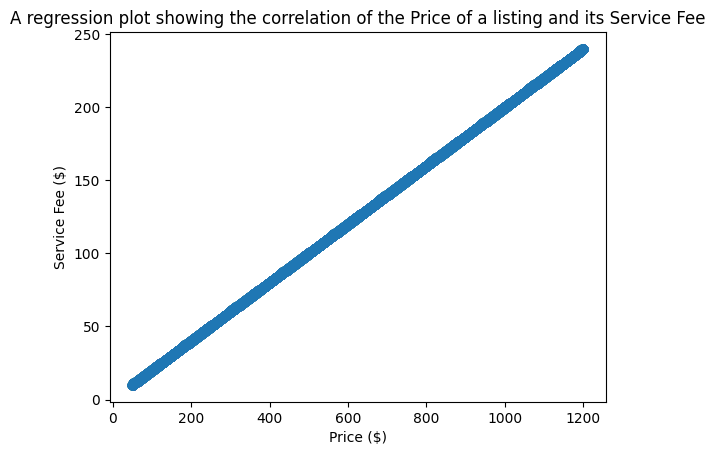

In [46]:
sns.regplot(df, x = '$price', y = '$service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A regression plot showing the correlation of the Price of a listing and its Service Fee');


What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group
and room type?

In [47]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN


review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.376157
                    Private room               3.322556
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.252236
                    Hotel room                 3.833333
                    Private room               3.283552
                    Shared room                3.326700
Manhattan           Entire home/apt            3.275310
                    Hotel room                 3.500000
                    Private room               3.293485
                    Shared room                3.260000
Queens              Entire home/apt            3.355581
                    Hotel room                 3.750000
                    Private room               3.318433
                    Shared room                3.326087
Staten Island       Entire home/apt            3.327711
                    Private room               3.487113
                    Shared room                3.714286
brooklyn            Private room               4.000000

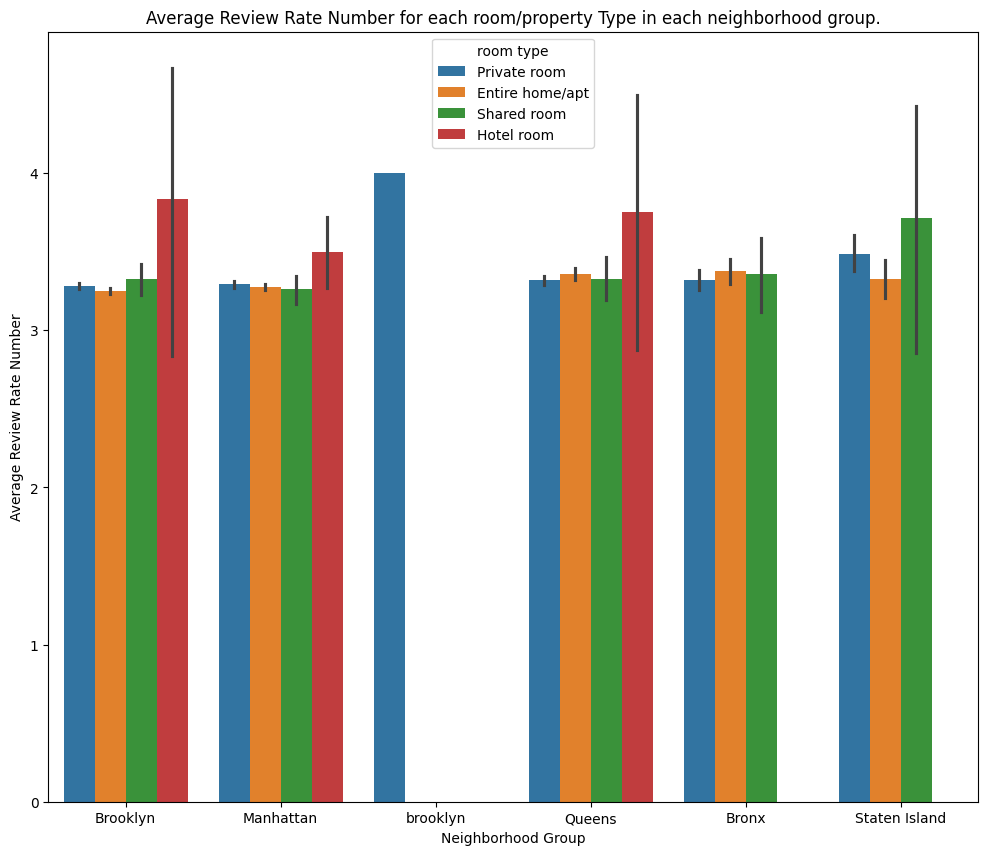

In [49]:
plt.figure(figsize=[12, 10]);
sns.barplot(data= df, x ='neighbourhood group', y ='review rate number', hue='room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate Number');
#plt.xticks(rotation = 45);
plt.title('Average Review Rate Number for each room/property Type in each neighborhood group.');


Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the
year?

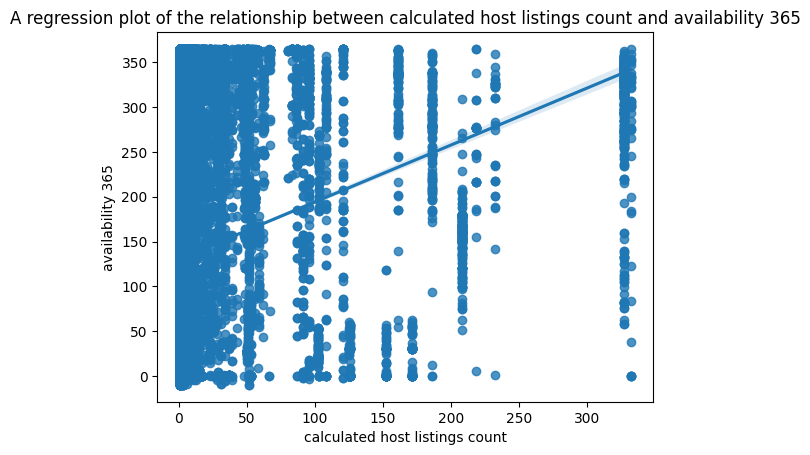

In [53]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df,x= 'calculated host listings count', y = 'availability 365');
plt.xlabel('calculated host listings count');
plt.ylabel('availability 365');
plt.title('A regression plot of the relationship between calculated host listings count and availability 365');

In [56]:
print(df['calculated host listings count'].corr(df['availability 365']))

0.14792824358366255
